# Package usage

This notebook aims to collect the number of dependent packages (within npm) to mainlines and variants, and also the number of dependent projects (from GitHub repositories) for them. As such, it requires `variants.csv.gz`, `dependencies.csv.gz` and `repo_deps.csv.gz`.

In [11]:
import pandas
import matplotlib
import seaborn

%matplotlib inline

In [2]:
df_variants = pandas.read_csv('../data/variants.csv.gz')
df_variants

,mainline,mainline_repo,mainline_repoid,variant,variant_repo,variant_repoid
0,wheat,creationix/wheat,162291,11zwheat,sun11/wheat,49882
1,wheat,creationix/wheat,162291,barley,frodare/barley,124697
2,keypair,juliangruber/keypair,110982,akeypair,quartzjer/akeypair,86500
3,keypair,juliangruber/keypair,110982,jh-keypair,johnhaley81/keypair,805497
4,sasl-digest-md5,jaredhanson/js-sasl-digest-md5,149511,alt-sasl-digest-md5,legastero/js-sasl-digest-md5,86665
...,...,...,...,...,...,...
12808,dot-values,bajankristof/dot-values,34049409,dot-values2,bluelovers/dot-values,41256794
12809,kompression,tuananh/kompression,30312975,@nivinjoseph/kompression,nivinjoseph/kompression,41256967
12810,contentful-typescript-codegen,intercom/contentful-typescript-codegen,39168489,@zeusdeux/contentful-typescript-codegen,zeusdeux/contentful-typescript-codegen,41257476
12811,prometheus-gc-stats,SimenB/node-prometheus-gc-stats,13589391,prometheus-gc-stats2,acifani/node-prometheus-gc-stats,41257504


In [3]:
df_dependencies = pandas.read_csv('../data/dependencies.csv.gz')
df_dependencies

,source,version,kind,target,constraint
0,0815,0.1.0,runtime,cli-color,>= 0.2.1
1,0815,0.1.0,runtime,mu2,>= 0.5.17
2,0815,0.1.1,runtime,cli-color,>= 0.2.1
3,0815,0.1.1,runtime,mu2,>= 0.5.17
4,0815,0.1.2,runtime,cli-color,>= 0.2.1
...,...,...,...,...,...
9785760,webpack-bundle-size-limit-plugin,0.0.6,Development,eslint-config-google,^0.14.0
9785761,ynk,0.0.1,Development,benchmark,^2.1.4
9785762,ss_react_ts_ui,1.0.2,Development,source-map-loader,^0.2.4
9785763,ss_react_ts_ui,1.0.3,Development,source-map-loader,^0.2.4


In [4]:
df_repodeps = pandas.read_csv('../data/repo_deps.csv.gz')
df_repodeps

,host,repository,repoid,kind,target,constraint
0,GitHub,brianmhunt/knockout-modal,1,development,gulp,^3.8.8
1,GitHub,brianmhunt/knockout-modal,1,development,gulp-autoprefixer,^1.0.0
2,GitHub,brianmhunt/knockout-modal,1,development,gulp-bump,^0.1.11
3,GitHub,brianmhunt/knockout-modal,1,development,gulp-connect,^2.0.6
4,GitHub,brianmhunt/knockout-modal,1,development,gulp-filter,^1.0.2
...,...,...,...,...,...,...
10395553,GitHub,tOke3i/alumniSPBU,20842227,development,gulp-cssnano,^2.1.2
10395554,GitHub,tOke3i/alumniSPBU,20842227,development,gulp-image,2.7.2
10395555,GitHub,tOke3i/alumniSPBU,20842227,development,gulp-minify,0.0.14
10395556,GitHub,tOke3i/alumniSPBU,20842227,development,gulp-plumber,1.1.0


### Counting the dependents

In [5]:
dependents = pandas.merge(
    left=(
        df_dependencies
        [['source', 'target']]
        .drop_duplicates()
        .groupby('target', sort=False)
        .count()
    ),
    right=(
        df_repodeps
        [['repoid', 'target']]
        .drop_duplicates()
        .groupby('target', sort=False)
        .count()
    ),
    how='outer',
    on='target',
).rename(columns={
    'source': 'packages', 'repoid': 'projects',
})

In [6]:
dependents

,packages,projects
target,,
cli-color,1998.0,2228.0
mu2,118.0,159.0
openid,44.0,173.0
deep-eql,283.0,855.0
mongoskin,178.0,1044.0
...,...,...
react-native-localsearch,NaN,1.0
@angular-redux/router,NaN,1.0
@angular-redux/core,NaN,1.0


We restrict these data to the variants under consideration. 

In [7]:
variants = df_variants['mainline'].append(df_variants['variant']).drop_duplicates()

In [8]:
df_dependents = (
    dependents
    .reindex(variants)
    .fillna(0)
    .astype(int)
).rename_axis(index='variant')

In [9]:
df_dependents.to_csv('../data/dependents.csv.gz', compression='gzip', index=True)

### Some figures

[None,
 (0, 100000),
 Text(0, 0.5, 'number of dependent projects'),
 None,
 (0, 100000),
 Text(0.5, 0, 'number of dependent packages')]

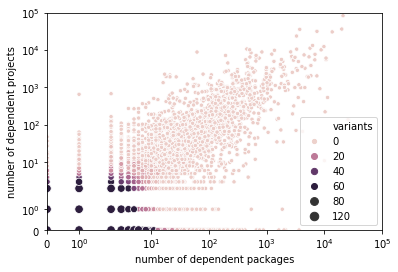

In [74]:
ax = seaborn.scatterplot(
    x='packages',
    y='projects',
    size='variants',
    hue='variants',
    hue_norm=(0, 50),
    size_norm=(0, 100),
    data=(
        df_dependents
        .assign(variants=1)
        .groupby(['packages', 'projects'], sort=False, as_index=False)
        .count()
    ),
)

ax.set(
    xlabel='number of dependent packages',
    xscale='symlog',
    xlim=(0, 100000),
    ylabel='number of dependent projects',
    ylim=(0, 100000),
    yscale='symlog',
)

In [57]:
df_variants = (
    df_variants
    [['mainline', 'variant']]
    .merge(df_dependents, how='inner', left_on='mainline', right_index=True)
    .merge(df_dependents, how='inner', left_on='variant', right_index=True, suffixes=('_mainline', '_variant'))
)

[None,
 (0, 10000),
 Text(0, 0.5, 'Dependent packages for variant'),
 None,
 (0, 10000),
 Text(0.5, 0, 'Dependent packages for mainline')]

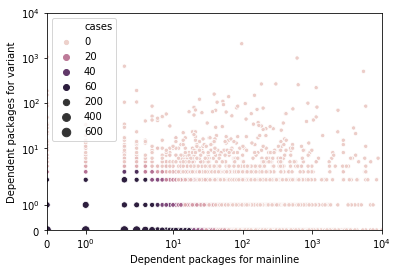

In [68]:
ax = seaborn.scatterplot(
    x='packages_mainline',
    y='packages_variant',
    size='cases',
    hue='cases',
    hue_norm=(0, 50),
    size_norm=(0, 500),
    data=(
        df_variants
        .assign(cases=1)
        .groupby(['packages_mainline', 'packages_variant'], sort=False, as_index=False)
        [['cases']]
        .count()
    )
)

ax.set(
    xlabel='Dependent packages for mainline',
    xscale='symlog',
    xlim=(0, 10000),
    ylabel='Dependent packages for variant',
    ylim=(0, 10000),
    yscale='symlog',
)

[None,
 (0, 10000),
 Text(0, 0.5, 'Dependent projects for variant'),
 None,
 (0, 10000),
 Text(0.5, 0, 'Dependent projects for mainline')]

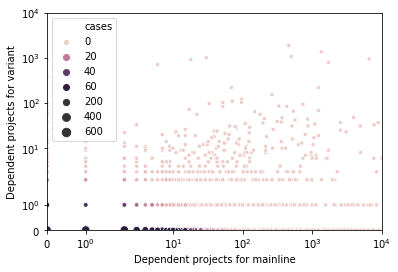

In [67]:
ax = seaborn.scatterplot(
    x='projects_mainline',
    y='projects_variant',
    size='cases',
    hue='cases',
    hue_norm=(0, 50),
    size_norm=(0, 500),
    data=(
        df_variants
        .assign(cases=1)
        .groupby(['projects_mainline', 'projects_variant'], sort=False, as_index=False)
        [['cases']]
        .count()
    )
)

ax.set(
    xlabel='Dependent projects for mainline',
    xscale='symlog',
    xlim=(0, 10000),
    ylabel='Dependent projects for variant',
    ylim=(0, 10000),
    yscale='symlog',
)